In [1]:
library(tidyverse)
library(ggplot2)
library(data.table)
library(ggpubr)
library(scales)
library(ggsci)
library(networkD3)
require(webshot)
library(rbokeh)

── Attaching core tidyverse packages ────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard



# Figure 2a

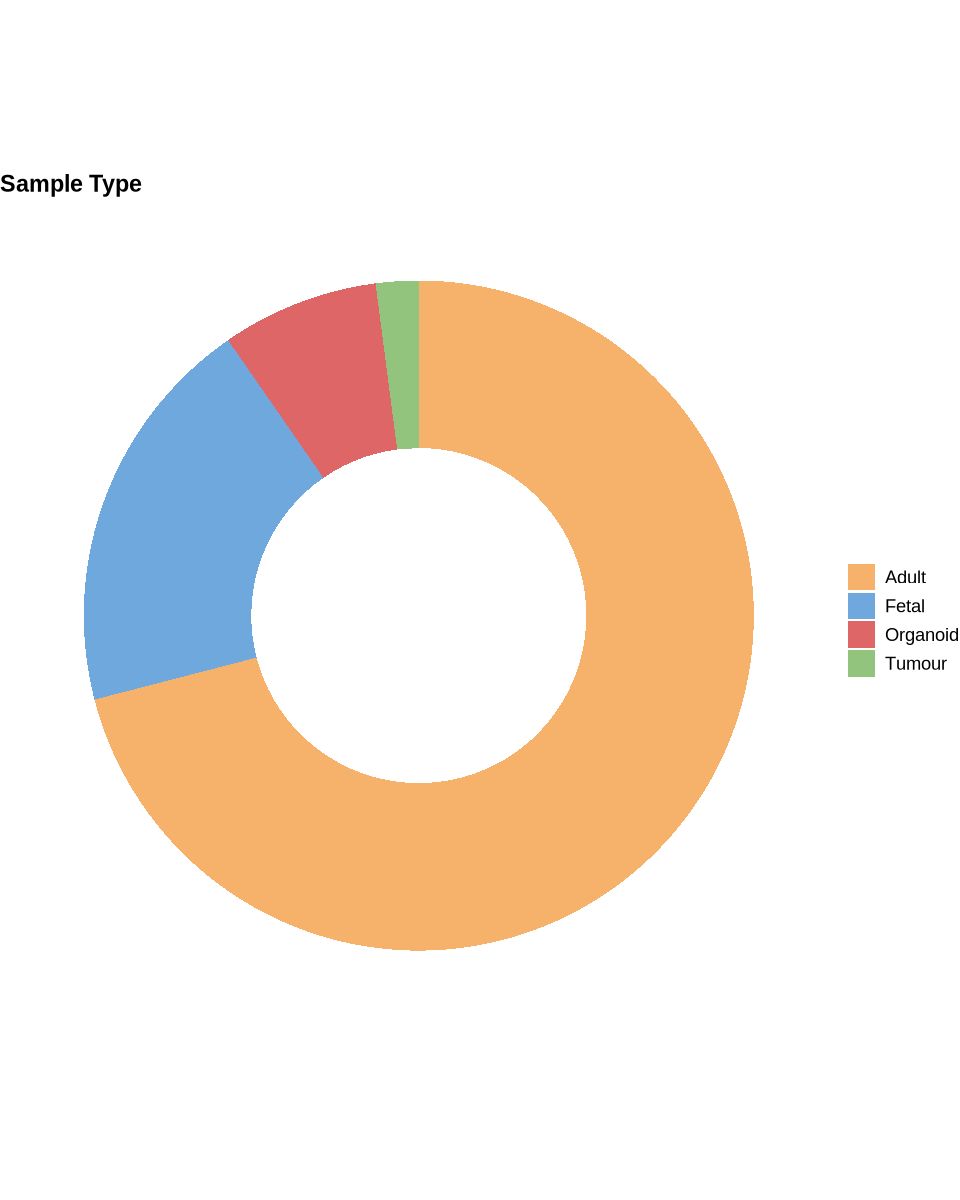

In [14]:
data <- data.frame(
    category = c('Adult', 'Fetal', 'Organoid', 'Tumour'),
    value = c(8062832, 2203728, 861169, 234295)) %>% arrange(desc(value))

my_colors <- c('#F6B26B','#6FA8DC','#DF6666', '#93C47D') 

# Compute percentages
data$fraction = data$value / sum(data$value)

# Compute the cumulative percentages (top of each rectangle)
data$ymax = cumsum(data$fraction)

# Compute the bottom of each rectangle
data$ymin = c(0, head(data$ymax, n=-1))
 
# Compute label position
data$labelPosition <- (data$ymax + data$ymin) / 2

data$label <- c('8,218,657', '2,203,728', '861,169', '78,470')

p <- 
ggplot(data, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill = category))+ 
geom_rect() + 
coord_polar(theta = "y") + 
theme_void() + 
scale_fill_manual(values = my_colors) + 
xlim(c(2, 4)) + 
theme(legend.title=element_blank(),
        legend.text=element_text(size=11),
        plot.title = element_text(size = 14, face = 'bold')) + 
labs(title = "Sample Type") 
p

#ggsave(p, filename = "images/SampleTypeCircular.png", bg = "transparent")
#ggsave(p, filename = "images/SampleTypeCircular.pdf")

# Figure 2b

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


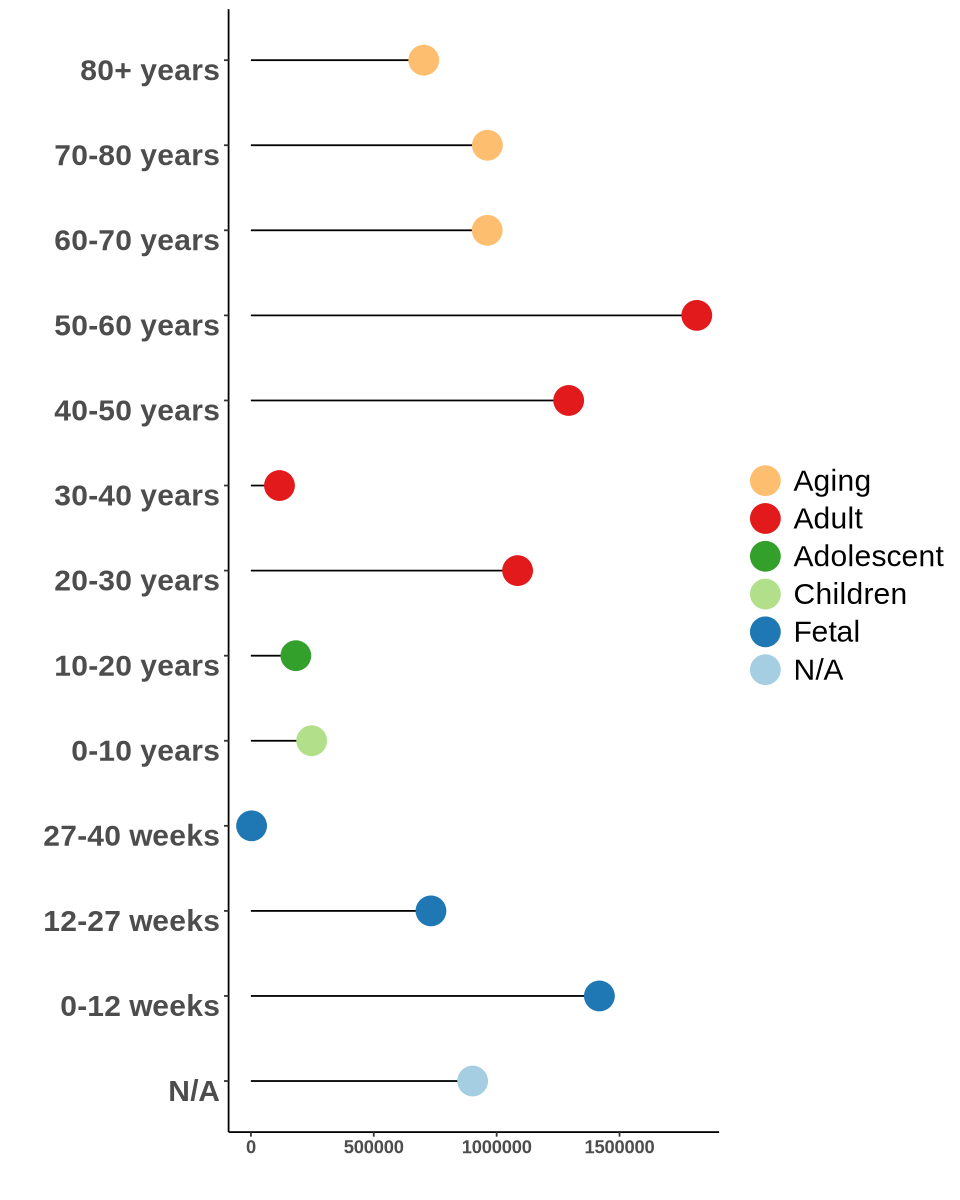

In [11]:
data <- data.frame(
  AgeGroup = c('N/A', '0-12 weeks', 
               '12-27 weeks', '27-40 weeks', 
               '0-10 years', '10-20 years', 
               '20-30 years','30-40 years', 
               '40-50 years', '50-60 years',
                '60-70 years', '70-80 years', 
                '80+ years'),
    SampleCount = c(902311, 1418071, 
                    732642, 2896,  
                    247356, 183000, 
                   1085240, 116358, 
                    1293051,1814274,
                    961561, 962301, 
                    703324), 
    Group = c('N/A', 'Fetal', 'Fetal', 'Fetal', 'Children', 'Adolescent', 'Adult',
             'Adult', 'Adult', 'Adult', 'Aging', 'Aging', 'Aging')
)

Name = c('N/A', 'Fetal', 'Children', 'Adolescent', 'Adult',
             'Adult', 'Aging')

AgeGroup = c('N/A', '0-12 weeks', 
               '12-27 weeks', '27-40 weeks', 
               '0-10 years', '10-20 years', 
               '20-30 years','30-40 years', 
               '40-50 years', '50-60 years',
                '60-70 years', '70-80 years', 
                '80+ years')

options(repr.plot.width = 8, repr.plot.height = 10)
p <- ggplot(data, aes(x = AgeGroup, y = SampleCount)) +
  geom_segment(
    aes(x = AgeGroup, xend = AgeGroup, y = 0, yend = SampleCount), color = 'black') + 
geom_point(aes(color = Group), size = 8, show.legend = TRUE) + scale_color_viridis_d() + 
theme_classic() + #scale_fill_manual(values = my_col) 
xlab('') + 
ylab('') + 
coord_flip() + 
theme(axis.text = element_text(size=11, face = 'bold'), 
      axis.title = element_text(size=20), 
      legend.title = element_blank(), 
      legend.text = element_text(size=18),
     axis.text.y = element_text(size = 18, angle = 0, vjust = 1, hjust=1),
     axis.title.x = element_text(vjust=-1.2),
     axis.title.y = element_text(vjust=1.2)) + 
scale_x_discrete(limits = AgeGroup) + 
scale_color_brewer(palette = 'Paired', limits = rev(Name), direction=-1)

p
#ggsave(p, filename = "images/AgeGroup.png")
#ggsave(p, filename = "images/AgeGroup.pdf")

# Figure 2c

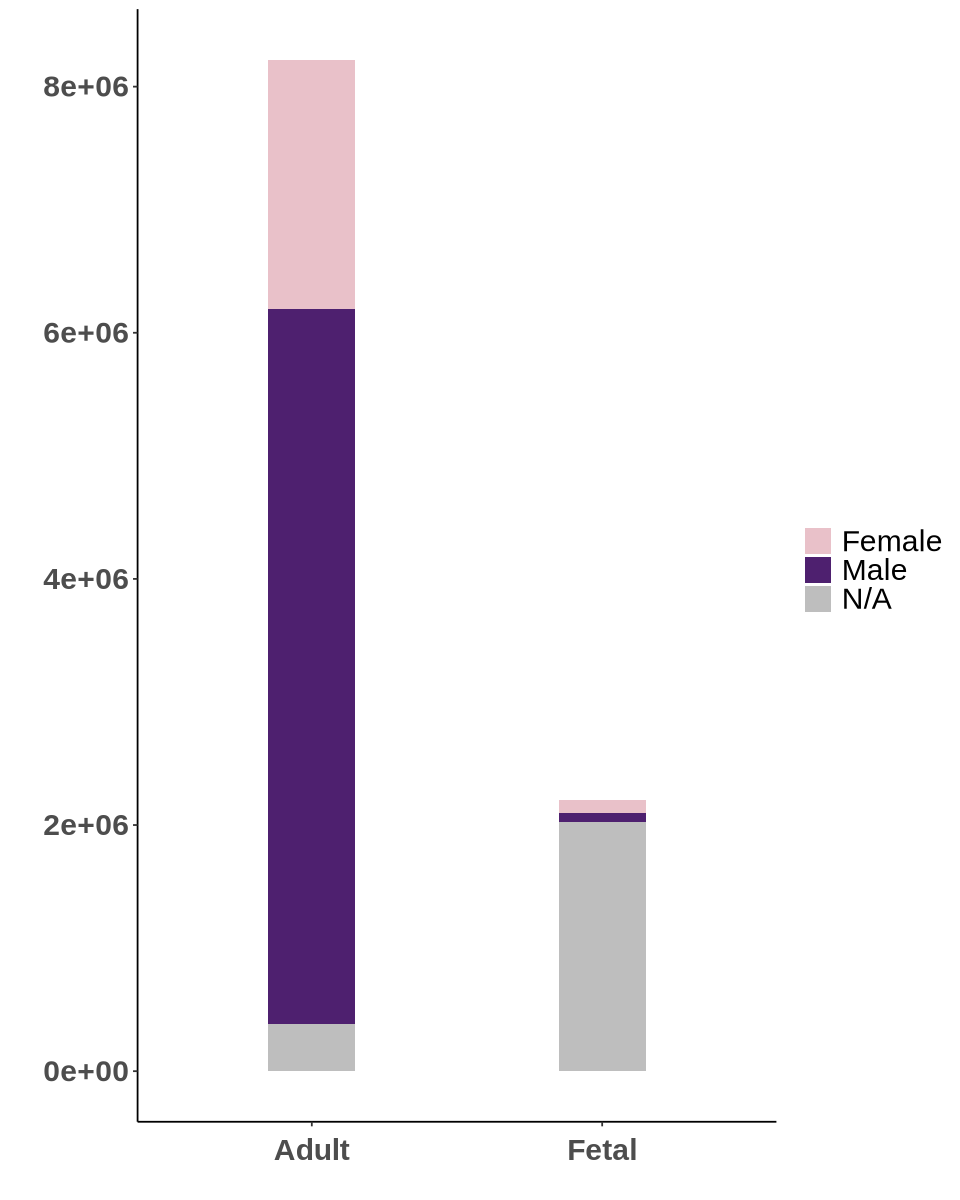

In [15]:
data <- data.frame(
  sex = c('Female', 'Male', 'N/A', 'Female', 'Male', 'N/A'),
    count = c(2024978, 5811997, 381682, 103176, 79860, 2020692),
type = c('Adult', 'Adult', 'Adult', 'Fetal', 'Fetal', 'Fetal'))


order = c('Adult', 'Fetal')
options(repr.plot.width = 8, repr.plot.height = 10)

p <- ggplot(data, aes(x = type, y = count))+
  geom_col(aes(fill = sex), width = 0.3)  +
  theme_minimal() + theme_classic()  +
theme(axis.text.x = element_text(angle = 0, hjust = 0.5, vjust=-.5, face = 'bold'),
      axis.text=element_text(size=18, face = 'bold'),
     axis.title =element_text(size=20, vjust = 0.5, hjust = 0.5),
     legend.text=element_text(size=18),
     legend.title=element_blank()) + 
xlab('') +
ylab('') + 
scale_fill_manual(values = c('#E9C1C9', '#4E206F','grey')) + 
scale_x_discrete(limits = order)

p

#ggsave(p, filename = "images/SexBarplot.png")
#ggsave(p, filename = "images/SexBarplot.pdf")


# Figure 2d

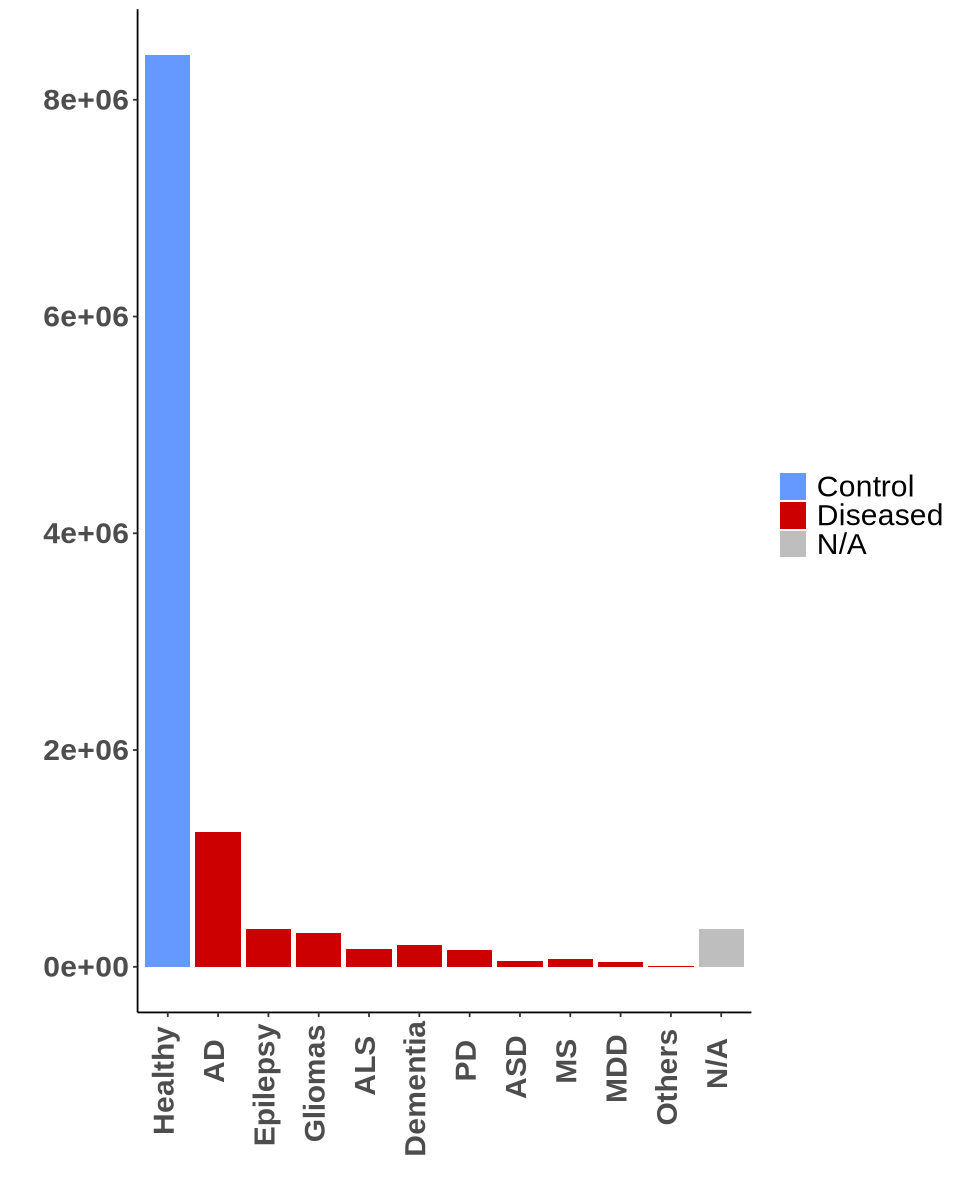

In [16]:
# disease status in Fetal and Adult exluding organoid and pure tumour samples
data <- data.frame(
  status = c('Healthy', 'AD', 'N/A', 'Epilepsy', 'Gliomas', 'ALS',
            'Dementia', 'PD', 'ASD', 'MS', 'MDD', 'Others'),
    count = c(8415651, 1245833, 352947, 347271,
             312054, 163883, 204428, 153478, 52003, 69394, 41944, 3305), 
Name = c('Control', 'Diseased', 'N/A', 'Diseased', 'Diseased',
         'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased')) %>% arrange(desc(count))
#$status <- reorder(data$status, data$count)


status = c('Healthy', 'AD', 'Epilepsy', 'Gliomas', 'ALS',
            'Dementia', 'PD', 'ASD', 'MS', 'MDD', 'Others','N/A')


order = c('Control', 'Diseased', 'N/A')

data$label <- c('8,218,657', '2,203,728', '861,169', '78,470')


cols = c('#6699FF','#CC0000','grey','#CC0000','#CC0000',
         '#CC0000','#CC0000','#CC0000',
         '#CC0000','#CC0000','#CC0000','#CC0000')

options(repr.plot.width = 8, repr.plot.height = 10)

p2 <- ggplot(data=data, aes(x=status, y=count)) +
  geom_bar(stat='identity', aes(fill = Name)) +
  theme_minimal() + theme_classic() +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.3, hjust = 0.8, face = 'bold'),
    axis.text = element_text(size = 18, face = 'bold'),
      legend.title=element_blank(),
    axis.title = element_text(size = 20, vjust = -1),
      legend.text=element_text(size=18)
  ) +
  xlab('') +
  ylab('') +
  scale_x_discrete(limits = status) +
  scale_fill_manual(
    values = c('Control' = "#6699FF", 'Diseased' = "#CC0000", 'N/A' = 'grey'),
    limits = order
  )

p2

#ggsave(p2, filename = "images/DiseaseStatusAdultFetal.png", bg = "transparent")
#ggsave(p2, filename = "images/DiseaseStatusAdultFetal.pdf")


# Figure 2f

In [13]:


df <- read.csv('AnatomyLevelsBrainCellAtlas.csv')

head(df)

# A connection data frame is a list of flows with intensity for each flow
links <- data.frame(
   source=df$L1, 
   target=df$L2, 
   value=df$value
 ) %>% unique()


#links <- read.csv("~/Documents/LungAtlas/HCLA_core/HLCA_fetal_adult_anno.csv", header = T)
# From these flows we need to create a node data frame: it lists every entities involved in the flow
nodes <- data.frame(
  name=c(as.character(links$source), 
         as.character(links$target)) %>% unique()
)

# With networkD3, connection must be provided using id, not using real name like in the links dataframe.. So we need to reformat it.
links$IDsource <- match(links$source, nodes$name)-1 
links$IDtarget <- match(links$target, nodes$name)-1

nodes$node_group <- gsub(" ", "_", nodes$name)

# Make the Network
p <- sankeyNetwork(Links = links, Nodes = nodes,
                   Source = "IDsource", Target = "IDtarget", NodeGroup = "node_group",
                   Value = "value", NodeID = "name", 
                   sinksRight=FALSE, iterations = 1, 
                   colourScale = JS(
            "d3.scaleOrdinal()
            .range(['#B3128A',
 '#B7CDEA',
 '#684a40',
 '#FFC285',
 '#3c5c95',
 '#68ab2a',
 '#ab4747',
 '#72655d',
 '#df8e01',
 '#74CAFF',
 '#c0588b',
 '#0094C2',
 '#00A79D',
 '#74A0FF',
 '#684a40',
 '#7AE6AB',
 '#9b43c9',
 '#A6E6A9',
 '#336D99',
 '#388899',
 '#578EBF',
 '#53D385',
 '#DF6666',
 '#72655d',
 '#72655d',
 '#72655d',
 '#72655d',
 '#D9C566',
 '#FFFF00',
 '#74CAFF',
 '#74CAFF',
 '#74CAFF',
 '#FF9F2C',
 '#c0588b',
 '#0094C2',
 '#00A79D',
 '#74A0FF',
 '#684a40',
 '#7AE6AB',
 '#9b43c9',
 '#A6E6A9',
 '#3c5c95',
 '#68ab2a',
 '#ab4747',
 '#df8e01',
 '#72655d',
 '#74CAFF'])"), fontFamily = "Arial",nodeWidth = 60, fontSize = 12, nodePadding = 6)
p

#rmarkdown::find_pandoc(dir = "~/anaconda3/envs/rplot/bin")
#saveNetwork(p, "SankeyAnatomy.html")


,L1,L2,sum,proportion,relative,value
,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>
1,Cerebral cortex,Frontal lobe,1644125,0.11981519,119.81519,24
2,Cerebral cortex,Occipital lobe,887860,0.06470257,64.70257,13
3,Cerebral cortex,Parietal lobe,184380,0.01343665,13.43665,3
4,Cerebral cortex,Temporal lobe,773743,0.05638632,56.38632,11
5,Limbic system,Amygdala,235228,0.01714218,17.14218,3
6,Limbic system,Basal ganglia,757703,0.05521741,55.21741,11


HTML widgets cannot be represented in plain text (need html)

# Figure 2g

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


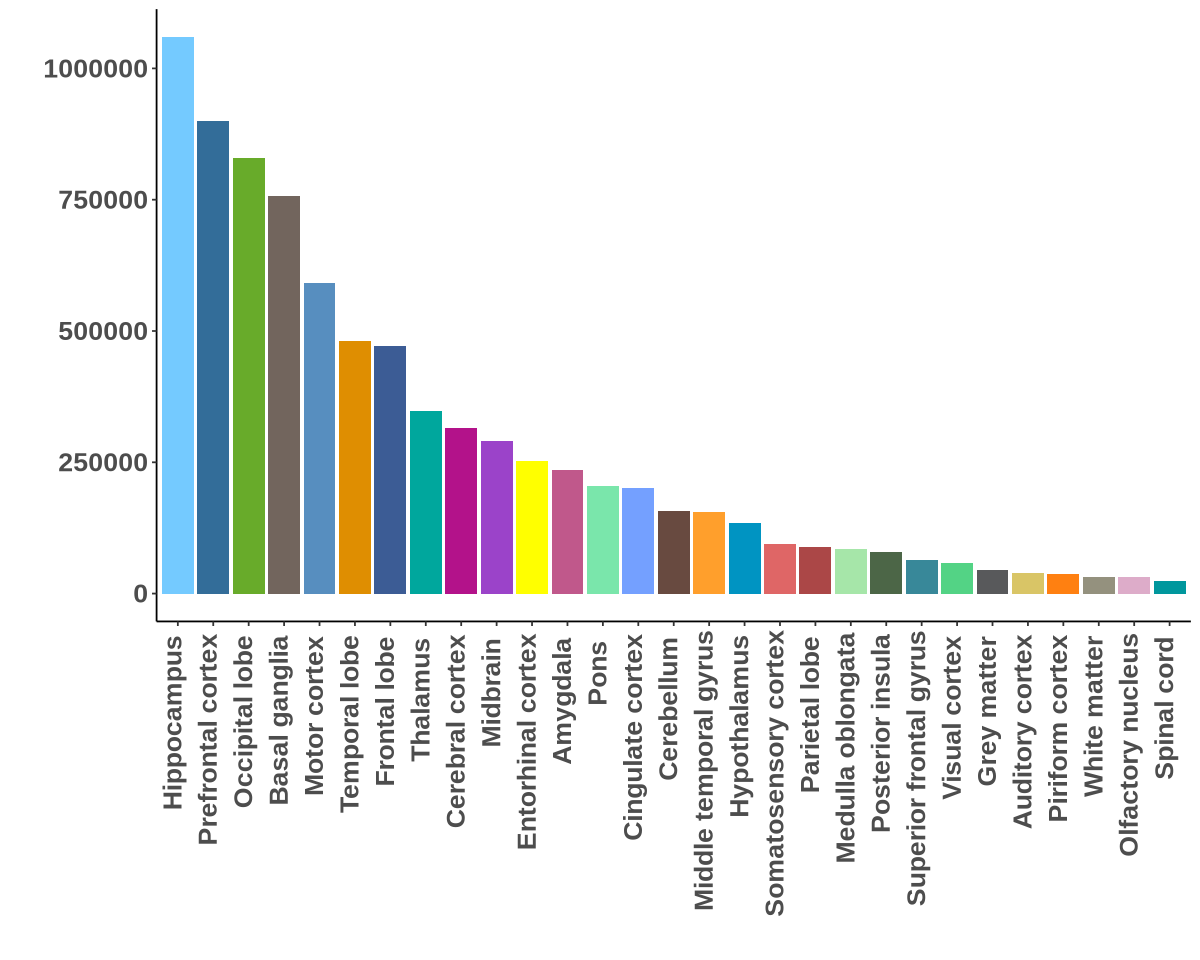

In [17]:
# disease status in Fetal and Adult exluding organoid and pure tumour samples
data <- data.frame(
  region = c('Hippocampus', 'Prefrontal cortex', 'Occipital lobe', 
             'Basal ganglia', 'Motor cortex', 'Temporal lobe', 
             'Frontal lobe', 'Thalamus', 'Cerebral cortex', 
             'Midbrain', 'Entorhinal cortex', 'Amygdala', 
             'Pons', 'Cingulate cortex', 'Cerebellum', 
             'Middle temporal gyrus', 'Hypothalamus', 'Somatosensory cortex', 
             'Parietal lobe', 'Medulla oblongata', 'Posterior insula', 
             'Superior frontal gyrus', 'Visual cortex', 'Grey matter', 
             'Auditory cortex', 'Piriform cortex', 'White matter', 
             'Olfactory nucleus','Spinal cord'),
    count = c(1059860, 898948, 829005,
              757703, 591166, 481722, 
              471013, 347279, 314848, 
              290740, 252761, 235228, 
              204168, 201913, 156850, 
              155913, 134471, 94925, 
              89455, 85487, 78633, 
              63608, 58855, 44144, 
              39260, 36941, 32516, 
              31230, 24190)) %>% arrange(desc(count))

col <- c('#74CAFF','#336D99','#68ab2a','#72655d','#578EBF','#df8e01',
         '#3c5c95','#00A79D','#B3128A','#9b43c9','#FFFF00','#c0588b',
         '#7AE6AB','#74A0FF','#684a40','#FF9F2C','#0094C2','#DF6666',
         '#ab4747','#A6E6A9','#4C6647','#388899','#53D385','#58595B',
         '#D9C566','#FF8011','#94917e','#DDACC9','#00979D')

region = c('Hippocampus', 'Prefrontal cortex', 'Occipital lobe', 
             'Basal ganglia', 'Motor cortex', 'Temporal lobe', 
             'Frontal lobe', 'Thalamus', 'Cerebral cortex', 
             'Midbrain', 'Entorhinal cortex', 'Amygdala', 
             'Pons', 'Cingulate cortex', 'Cerebellum', 
             'Middle temporal gyrus', 'Hypothalamus', 'Somatosensory cortex', 
             'Parietal lobe', 'Medulla oblongata', 'Posterior insula', 
             'Superior frontal gyrus', 'Visual cortex', 'Grey matter', 
             'Auditory cortex', 'Piriform cortex', 'White matter', 
             'Olfactory nucleus','Spinal cord')


options(repr.plot.width = 10, repr.plot.height = 8)
p2 <- ggplot(data=data, aes(x=region, y=count)) +
  geom_bar(fill = col, stat="identity") +
  theme_minimal() + theme_classic() +
theme(axis.text.x = element_text(angle = 90, vjust = 0.2, hjust=0.95, face = 'bold'),
      axis.text=element_text(size=16, face = 'bold'),
     axis.title =element_text(size=20)) + 
xlab('') +
ylab('')  +
scale_fill_manual() + scale_x_discrete(limits = region)

p2  + scale_fill_manual(values = rev(col[1:length(data$region)]))

#ggsave(p2, filename = "images/AdultRegionCells.png", width = 10, height = 7)
#ggsave(p2, filename = "images/AdultRegionCells.pdf", width = 10, height = 7)

# Figure 2h

In [ ]:
```python```

In [ ]:
import os
import scanpy as sc
import pandas as pd
%pylab inline
import numpy as np
import pickle
import matplotlib.pyplot as plt

ad = sc.read('/home/chen_xinyue/BrainAtlas/Figures/merged_200_Adult.qcGene_norm_deluns.h5ad')

marker_select = {'Amygdala excitatory': [ 'ENC1','SLC17A7',
 'TAFA2'],
 'Astrocyte': ['SLC1A2','GFAP', 'AQP4'],
 'Bergmann glia': ['ADAMTSL1', 'LINC01727', 'ALDH1A1'],
 'CGE interneuron': ['RGS12', 'CXCL14','GAD1'],
 'Cerebellar inhibitory': ['INPP4B', 'EML5', 'GRM1'],
 'Choroid plexus': ['TTR', 'PRLR', 'NWD1'],
 'Committed oligodendrocyte precursor': ['PLP1','ST18','BCAS1'],
 'Deep-layer corticothalamic and 6b': ['KIAA1217','ASIC2','ADAMTSL1'],
 'Deep-layer intratelencephalic': ['CHN1', 'POU6F2','IL1RAPL2'],
 'Deep-layer near-projecting': ['TSHZ2', 'NPSR1-AS1', 'IFNG-AS1'],
 'Eccentric medium spiny neuron': ['PBX3','MEIS2', 'SOX2-OT'],
 'Ependymal': ['CFAP54','DNAH9', 'CFAP299'],
 'Fibroblast': ['CEMIP', 'DCN', 'CEMIP'],
 'Hippocampal CA1-3': ['COL24A1', 'COL5A2','CCBE1'],
 'Hippocampal CA4': ['SHISA6', 'NRP1', 'TRHDE'],
 'Hippocampal dentate gyrus': ['SEMA5A','ADRA1A','ALDH1A2'],
 'LAMP5-LHX6 and Chandelier': ['FGF13', 'TMEM132D', 'KCNC2'],
 'Lower rhombic lip': ['THSD7B', 'NEFL','NEFM'],
 'MGE interneuron': ['KCNC2', 'KIAA1217','NXPH1'],
 'Mammillary body': ['TAFA1', 'ZFHX3','ALCAM'],
 'Medium spiny neuron': ['DGKH', 'CAMK4','ANO3'],
 'Microglia': ['SPP1','APBB1IP', 'CD74'],
 'Midbrain-derived inhibitory': ['SPHKAP','CHRM2','OTX2-AS1'],
 'Oligodendrocyte': ['TMTC2','ANLN','LRP2'],
 'Oligodendrocyte precursor': ['PTPRZ1', 'VCAN','PCDH15'],
 'Thalamic excitatory': ['NTNG1', 'PCP4', 'FSTL4'],
 'Upper rhombic lip': ['CADPS2', 'CHN2', 'RELN'],
 'Upper-layer intratelencephalic': ['CBLN2','IQCJ-SCHIP1','MLIP'],
 'Vascular': ['FLT1', 'MECOM','COBLL1'],
 'Splatter': ['RMST', 'KLHL1', 'CALY'],
 'Miscellaneous':  ['TSHZ2', 'NRGN', 'STAT4']}

order = [
         'Astrocyte',
    'Bergmann glia',
         'Oligodendrocyte precursor',
    'Committed oligodendrocyte precursor',
     'Oligodendrocyte', 
         'CGE interneuron', 
       'MGE interneuron', 
         'Cerebellar inhibitory', 
           'Midbrain-derived inhibitory', 
         'LAMP5-LHX6 and Chandelier',
     'Eccentric medium spiny neuron', 
     'Medium spiny neuron',
    'Deep-layer corticothalamic and 6b', 
         'Deep-layer intratelencephalic', 
         'Deep-layer near-projecting', 
    'Amygdala excitatory', 
             'Thalamic excitatory', 
         'Hippocampal CA1-3', 
         'Hippocampal CA4', 
         'Hippocampal dentate gyrus', 
             'Choroid plexus',
      'Mammillary body', 
         'Lower rhombic lip',                       
         'Upper rhombic lip', 
         'Upper-layer intratelencephalic', 
     'Microglia',
     'Ependymal', 
         'Fibroblast', 
         'Vascular', 
         'Splatter', 'Miscellaneous']

markersDictSorted = {k: marker_select[k] for k in order}

plt.rcParams.update({'font.size': '20', 'font.weight': 'normal', 'legend.fontsize': 10,
          'legend.handlelength': 0.7, 'legend.labelspacing':1})
sc.pl.dotplot(ad, markersDictSorted, 'cell_type', categories_order = order, save = 'AdultCelldotplot_revised_bold.pdf', colorbar_title = 'Mean\nexpression',
    size_title = 'Fraction\nof cells')

# Figure 2i

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

import warnings
warnings.filterwarnings("ignore")
import scanpy as sc
import os
import gc
os.chdir('/home/hzl/hpc/project/brain/data/annotated/')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
Adult = sc.read('../data/mergeData/latent_merged_all_Adult.h5ad')

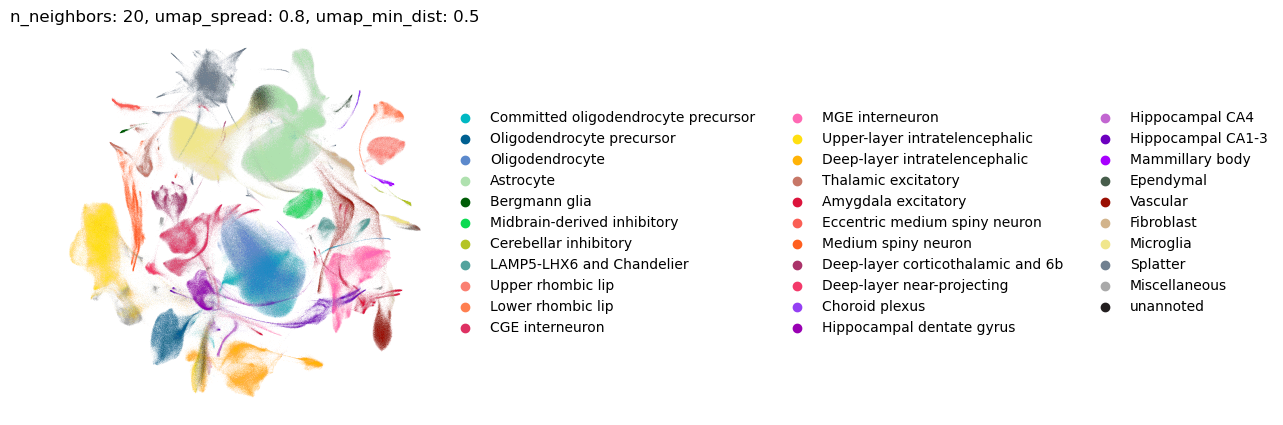

In [90]:
Adult.obs['cell_type'] = Adult.obs['cell_type'].cat.reorder_categories(['Committed oligodendrocyte precursor', 'Oligodendrocyte precursor', 'Oligodendrocyte', 'Astrocyte', 'Bergmann glia', 'Midbrain-derived inhibitory', 'Cerebellar inhibitory', 'LAMP5-LHX6 and Chandelier', 'Upper rhombic lip', 'Lower rhombic lip', 'CGE interneuron', 'MGE interneuron', 'Upper-layer intratelencephalic', 'Deep-layer intratelencephalic', 'Thalamic excitatory', 'Amygdala excitatory', 'Eccentric medium spiny neuron', 'Medium spiny neuron', 'Deep-layer corticothalamic and 6b', 'Deep-layer near-projecting', 'Choroid plexus', 'Hippocampal dentate gyrus', 'Hippocampal CA4', 'Hippocampal CA1-3', 'Mammillary body', 'Ependymal', 'Vascular', 'Fibroblast', 'Microglia', 'Splatter', 'Miscellaneous', 'unannoted'], ordered=True)
Adult.uns['cell_type_colors'] = ['#00B8C3', '#006091', '#5C89CC', '#AFE1AF', '#005C07', '#0BDA51', '#B4C424', '#53A39D', '#FA8072', '#FF7F50', '#DE3163', '#FF69B4', '#FFDF11', '#FFB307', '#C77767', '#DC143C', '#FA5F55', '#FF5F1F', '#AA336A', '#F33A6A', '#9440F3', '#9900B3', '#C266D1', '#6C00BF', '#A700FF', '#475D4B', '#9A0F03', '#D2B48C', '#F0E68C', '#708090', '#A9A9A9', '#231F20']


for n_neighbors in [20]:
    n_neighbors = n_neighbors
    umap_spread = 0.8
    umap_min_dist = 0.5
    sc.pp.neighbors(Adult, use_rep="X_scvi", method='rapids', n_neighbors=n_neighbors)
    sc.tl.umap(Adult, method='rapids', spread=umap_spread, min_dist=umap_min_dist)
    figsize(5,5)
    sc.pl.umap(sc.pp.subsample(Adult, n_obs=2000000, copy=True), color=['cell_type'], title=(f'n_neighbors: {n_neighbors}, umap_spread: {umap_spread}, umap_min_dist: {umap_min_dist}'), frameon=False)
    plt.show()

In [18]:
Adult.obs['cell_type'] = Adult.obs['cell_type'].cat.reorder_categories(['Committed oligodendrocyte precursor', 'Oligodendrocyte precursor', 'Oligodendrocyte', 'Astrocyte', 'Bergmann glia', 'Midbrain-derived inhibitory', 'Cerebellar inhibitory', 'LAMP5-LHX6 and Chandelier', 'Upper rhombic lip', 'Lower rhombic lip', 'CGE interneuron', 'MGE interneuron', 'Upper-layer intratelencephalic', 'Deep-layer intratelencephalic', 'Thalamic excitatory', 'Amygdala excitatory', 'Eccentric medium spiny neuron', 'Medium spiny neuron', 'Deep-layer corticothalamic and 6b', 'Deep-layer near-projecting', 'Choroid plexus', 'Hippocampal dentate gyrus', 'Hippocampal CA4', 'Hippocampal CA1-3', 'Mammillary body', 'Ependymal', 'Vascular', 'Fibroblast', 'Microglia', 'Splatter', 'Miscellaneous', 'unannoted'], ordered=True)
Adult.uns['cell_type_colors'] = ['#00B8C3', '#006091', '#5C89CC', '#AFE1AF', '#005C07', '#0BDA51', '#B4C424', '#53A39D', '#FA8072', '#FF7F50', '#DE3163', '#FF69B4', '#FFDF11', '#FFB307', '#C77767', '#DC143C', '#FA5F55', '#FF5F1F', '#AA336A', '#F33A6A', '#9440F3', '#9900B3', '#C266D1', '#6C00BF', '#A700FF', '#475D4B', '#9A0F03', '#D2B48C', '#F0E68C', '#708090', '#A9A9A9', '#231F20']

In [46]:
Adult.write_h5ad('../mergeData/latent_umap_merged_all_Adult.h5ad')

In [5]:
ad = sc.read('../data/mergeData/latent_umap_merged_all_Adult.h5ad')
ad

AnnData object with n_obs × n_vars = 8062832 × 1841
    obs: 'cell_ID', 'seq_tech', 'donor_ID', 'donor_gender', 'donor_age', 'donor_status', 'original_name', 'organ', 'region', 'subregion', 'sample_status', 'treatment', 'ethnicity', 'if_patient', 'species', 'sample_type', 'seq_method', 'project_code', 'sample_ID', 'reference', 'original_name2', 'Siletti_singleCellNet', 'Siletti_SingleR', 'Siletti_scPred', 'Siletti_scMap', 'Siletti_CHETAH', 'Siletti_scArches', 'Siletti_ACTINN', 'Siletti_modf_SCANVI_L1', 'Siletti_modf_SCANVI_L2', 'cell_type', 'DEGregion'
    uns: 'Siletti_modf_SCANVI_L1_colors', 'cell_type_colors', 'neighbors', 'umap'
    obsm: 'X_cca', 'X_cca.aligned', 'X_pca', 'X_pca_corrected', 'X_pca_harmony', 'X_pca_opt', 'X_scvi', 'X_tsne', 'X_umap', 'X_umapHmny', 'X_umapRaw'
    obsp: 'connectivities', 'distances'

In [26]:
newlatent = pd.read_csv('/home/huang_yin/projA/data/scvi/latent_umap_merged_all_Adult.csv', index_col=0)
newlatent

,predict_level1
AAACCCAAGTGGACGT-1-0-0,Microglia
AAACGAAAGTGAATAC-1-0-0,CGE interneuron
AAACGAATCGACACTA-1-0-0,Astrocyte
AAACGAATCGAGATAA-1-0-0,Astrocyte
AAACGCTAGTAAGACT-1-0-0,Astrocyte
...,...
WG960039_G08-W03-0,Deep-layer near-projecting
WG960039_E06-W16-0,Deep-layer near-projecting
WG960039_C06-W10-0,Deep-layer near-projecting
WG960039_G12-W11-0,Deep-layer near-projecting


In [33]:
adsub = sc.pp.subsample(ad, n_obs=2000000, copy=True)

In [38]:
ids = ['Siletti_singleCellNet', 'Siletti_SingleR', 'Siletti_scPred', 'Siletti_scMap', 'Siletti_CHETAH', 'Siletti_scArches', 'Siletti_ACTINN']
adsub.obs['cell_type_for_review'] = adsub.obs[ids+['new_cell_type']].apply(lambda x: x.mode()[0], axis=1).astype(str)
adsub.obs['cell_type_for_review']

GATTGGTTCGCCGAGT-229MCX-0                                             Oligodendrocyte
TCAGTGAGTCGGTGAA_3-0                                                         Vascular
pPDsHSrSNxi2142d200429DAPIA_TCATGCCTCTTGGCTC-1-0                            Microglia
10X330_6:GGGTATTAGTGTACCT-0                            Upper-layer intratelencephalic
ATCGTAGCACCCAACG-304MCX-0                           Deep-layer corticothalamic and 6b
                                                                  ...                
GGAGCAACAACGTTAC-1-1-0                                                      Astrocyte
AACTTCTTCCATCTGC-1-15-0                                                     Astrocyte
TCCTCCCTCCTCGATC-1-22-0                                                 Miscellaneous
HSB179_6_eDG_GGGACCTCATCTTCGC-0                                             unannoted
CCTCCAATCTTCCTAA-1-19-0                             Deep-layer corticothalamic and 6b
Name: cell_type_for_review, Length: 2000000, dtype: ob

In [41]:
adsub.obs['cell_type_for_review'] = adsub.obs['cell_type_for_review'].cat.reorder_categories(['Committed oligodendrocyte precursor', 'Oligodendrocyte precursor', 'Oligodendrocyte', 'Astrocyte', 'Bergmann glia', 'Midbrain-derived inhibitory', 'Cerebellar inhibitory', 'LAMP5-LHX6 and Chandelier', 'Upper rhombic lip', 'Lower rhombic lip', 'CGE interneuron', 'MGE interneuron', 'Upper-layer intratelencephalic', 'Deep-layer intratelencephalic', 'Thalamic excitatory', 'Amygdala excitatory', 'Eccentric medium spiny neuron', 'Medium spiny neuron', 'Deep-layer corticothalamic and 6b', 'Deep-layer near-projecting', 'Choroid plexus', 'Hippocampal dentate gyrus', 'Hippocampal CA4', 'Hippocampal CA1-3', 'Mammillary body', 'Ependymal', 'Vascular', 'Fibroblast', 'Microglia', 'Splatter', 'Miscellaneous', 'unannoted'], ordered=True)
adsub.uns['cell_type_for_review_colors'] = ['#00B8C3', '#006091', '#5C89CC', '#AFE1AF', '#005C07', '#0BDA51', '#B4C424', '#53A39D', '#FA8072', '#FF7F50', '#DE3163', '#FF69B4', '#FFDF11', '#FFB307', '#C77767', '#DC143C', '#FA5F55', '#FF5F1F', '#AA336A', '#F33A6A', '#9440F3', '#9900B3', '#C266D1', '#6C00BF', '#A700FF', '#475D4B', '#9A0F03', '#D2B48C', '#F0E68C', '#708090', '#A9A9A9', '#231F20']

In [43]:
adsubClean = adsub[(adsub.obs.cell_type_for_review != 'unannoted')]
adsubClean

View of AnnData object with n_obs × n_vars = 1914955 × 1841
    obs: 'cell_ID', 'seq_tech', 'donor_ID', 'donor_gender', 'donor_age', 'donor_status', 'original_name', 'organ', 'region', 'subregion', 'sample_status', 'treatment', 'ethnicity', 'if_patient', 'species', 'sample_type', 'seq_method', 'project_code', 'sample_ID', 'reference', 'original_name2', 'Siletti_singleCellNet', 'Siletti_SingleR', 'Siletti_scPred', 'Siletti_scMap', 'Siletti_CHETAH', 'Siletti_scArches', 'Siletti_ACTINN', 'Siletti_modf_SCANVI_L1', 'Siletti_modf_SCANVI_L2', 'cell_type', 'DEGregion', 'new_cell_type', 'cell_type_for_review'
    uns: 'Siletti_modf_SCANVI_L1_colors', 'cell_type_colors', 'neighbors', 'umap', 'new_cell_type_colors', 'cell_type_for_review_colors'
    obsm: 'X_cca', 'X_cca.aligned', 'X_pca', 'X_pca_corrected', 'X_pca_harmony', 'X_pca_opt', 'X_scvi', 'X_tsne', 'X_umap', 'X_umapHmny', 'X_umapRaw'
    obsp: 'connectivities', 'distances'

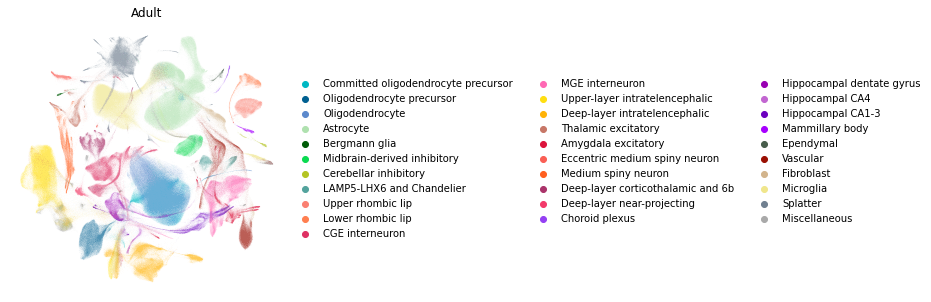

In [44]:
figsize(5,5)
sc.pl.umap(adsubClean, color=['cell_type_for_review'], title='Adult', frameon=False, save='_200w_adult_forReview.pdf')

# Figure 2j

In [ ]:
library(data.table)
library(ggplot2)
library(dplyr)
library(ggstatsplot)
library(gginnards)
library(extrafont)

In [ ]:
font_import()
loadfonts(device = "all")

PropPlot <- function(data, groupBy, splitBy){
  # (1)获取绘图数据
  plot_data = data %>% 
    dplyr::select({{splitBy}}, {{groupBy}}) %>% 
    dplyr::rename(group = as.name(groupBy))
  
  # (2)绘图
  figure = ggbarstats(data = plot_data, 
                      x = group, y = {{splitBy}},
                      package = 'Polychrome',
                      palette = c('palette36'),
                      results.subtitle = FALSE,
                      bf.message = FALSE,
                      proportion.test = FALSE,
                      label.args = list(size = 2, 
                                        fill = 'white', 
                                        alpha = 0.85,
                                        family = 'Arial',
                                        fontface = 'bold'),
                      perc.k = 2,
                      title = '',
                      xlab = 'Datasets',
                      legend.title = 'Cell Types',
                      ggtheme = ggpubr::theme_pubclean()) +
    theme(axis.ticks.x = element_blank(),
          axis.ticks.y = element_line(color = 'black', lineend = 'round'),
          legend.position = 'right',
          axis.text.x = element_blank(),
          axis.text.y = element_text(size = 15, color = 'black', family = 'Arial'),
          legend.text = element_text(family = 'Arial', size = 10, color = 'black'),
          legend.title = element_text(family = 'Arial', size = 13, color = 'black')) 
  
  # (3)去除柱子下面的样本量标识：
  # gginnards::delete_layers(x = figure, match_type = 'GeomText')
  return(figure)
}

In [ ]:
obs = fread('../../data/mergeData/merged_obs.tsv', header = T, sep = '\t')

mycols = colorRampPalette(paletteer::paletteer_d("ggsci::category20_d3"), interpolate = 'spline')(34)

# by tissus
p = PropPlot(obs, 'cell_type', 'region') %>% delete_layers(match_type = c('GeomText')) %>% delete_layers(match_type = c('GeomLabel')) +
  scale_fill_manual(values = mycols) +
  theme(axis.text.x = element_text(size = 10, color = 'black', family = 'Arial', vjust = 0, angle = -45, hjust = 0)) 
p
cairo_pdf('plot/celltypeByDataset.pdf', width = 14, height = 6)
print(p)
dev.off()